In [2]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib_venn import venn2, venn3
import os
import numpy as np

In [3]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='o'
legend=True

# download data please run only once

In [4]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE62nnn/GSE62857/suppl/GSE62857_ce_geneExpression_soma_germline_normalized.txt.gz

--2020-04-30 16:51:56--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE62nnn/GSE62857/suppl/GSE62857_ce_geneExpression_soma_germline_normalized.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 2607:f220:41e:250::12
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217789 (213K) [application/x-gzip]
Saving to: 'GSE62857_ce_geneExpression_soma_germline_normalized.txt.gz'

100%[======================================>] 217,789      562KB/s   in 0.4s   

2020-04-30 16:51:57 (562 KB/s) - 'GSE62857_ce_geneExpression_soma_germline_normalized.txt.gz' saved [217789/217789]



In [5]:
!gunzip -f GSE62857_ce_geneExpression_soma_germline_normalized.txt.gz

In [6]:
df = pd.read_csv("GSE62857_ce_geneExpression_soma_germline_normalized.txt", sep="\t")

In [7]:
df.head()

,gonad_1,gonad_2,glp4_1,glp4_2
WBGene00007063,8.7319,8.9128,8.6027,9.2598
WBGene00007064,7.4707,7.5131,9.9146,9.7907
WBGene00044165,3.7255,3.4373,3.3686,3.7367
WBGene00007065,6.6135,6.7933,5.3843,5.1870
WBGene00003525,3.4772,3.3057,4.4577,4.8739


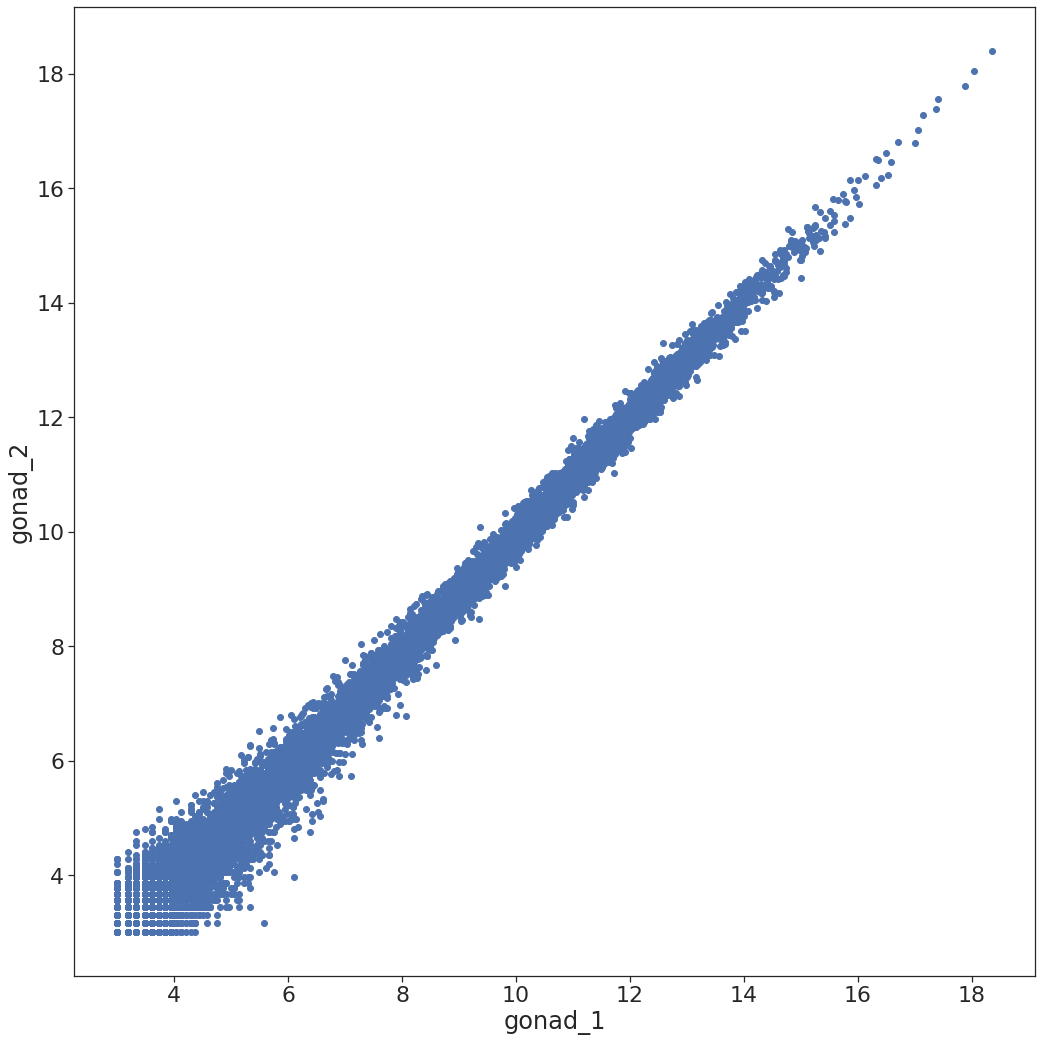

In [8]:
sns_plot = sns.lmplot(x="gonad_1",
                      y="gonad_2",
                      data=df,
                      fit_reg=False,
#                       hue=f"Significant_{df_name}",
#                       hue_order=["No", "FDR<0.05"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
# sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

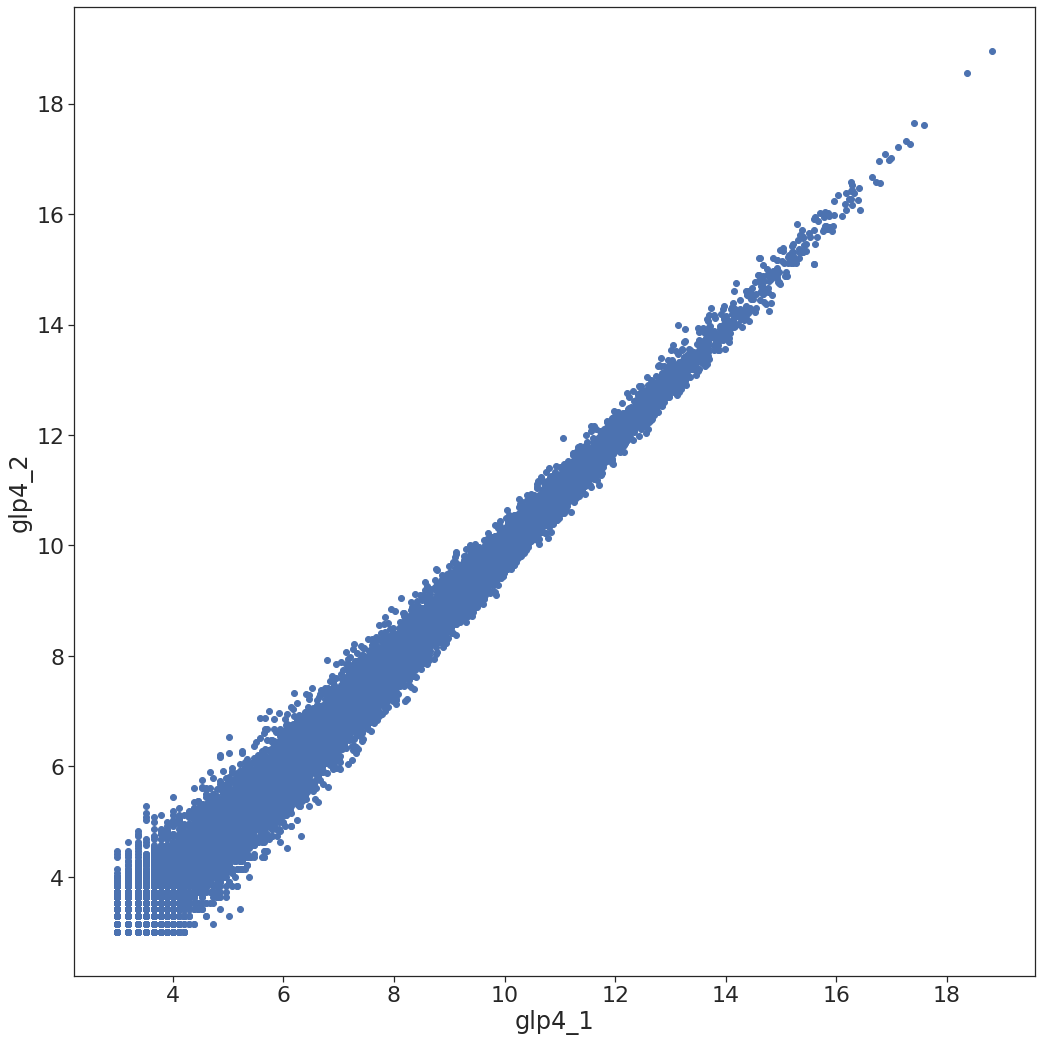

In [9]:
sns_plot = sns.lmplot(x="glp4_1",
                      y="glp4_2",
                      data=df,
                      fit_reg=False,
#                       hue=f"Significant_{df_name}",
#                       hue_order=["No", "FDR<0.05"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
# sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

In [10]:
df["gonad_mean"] = df[["gonad_1", "gonad_2"]].mean(axis=1)

In [11]:
df["glp4_mean"] = df[["glp4_1", "glp4_2"]].mean(axis=1)

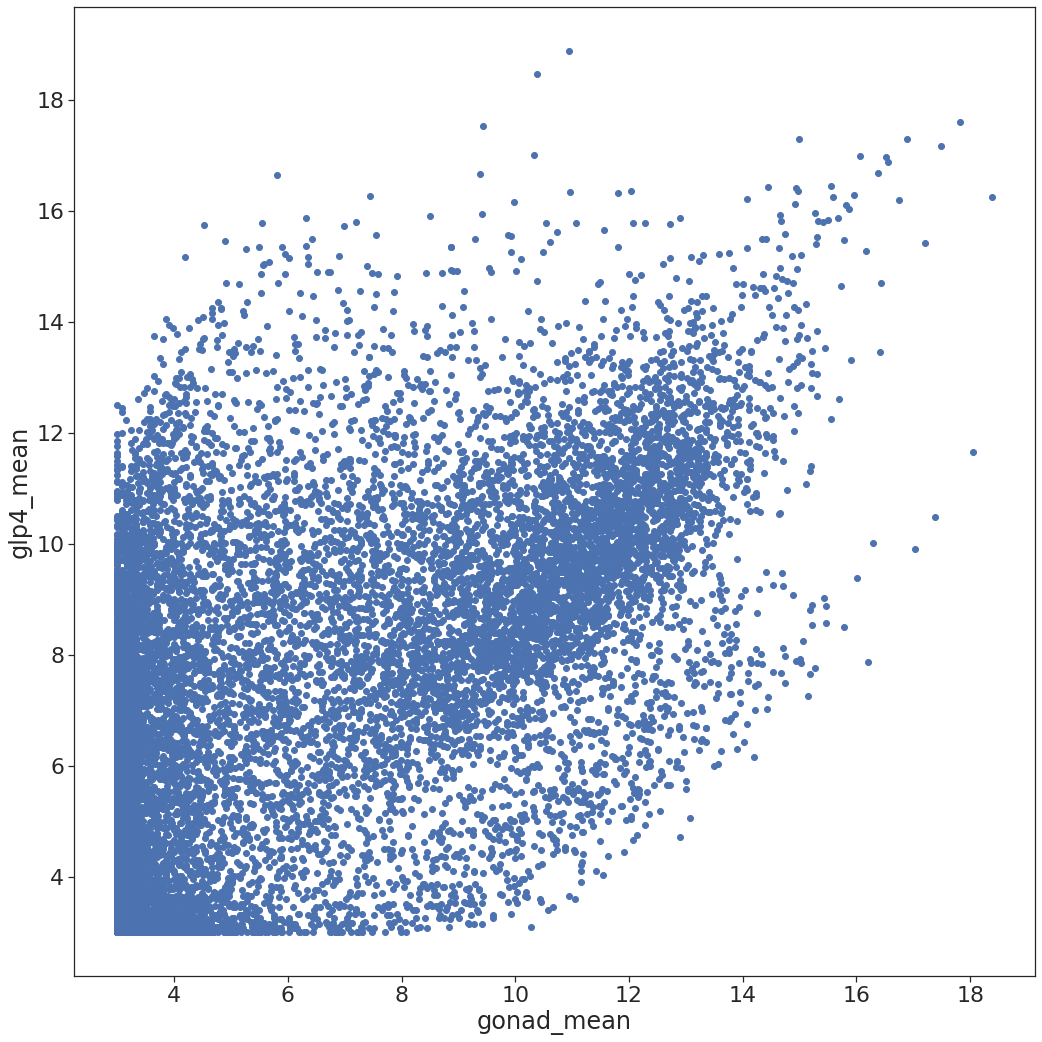

In [12]:
sns_plot = sns.lmplot(x="gonad_mean",
                      y="glp4_mean",
                      data=df,
                      fit_reg=False,
#                       hue=f"Significant_{df_name}",
#                       hue_order=["No", "FDR<0.05"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
# sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

In [13]:
wago_1_ONLY_specific_path = "../../comparisons/list_of_blue_points_IP_WAGO_1_ONLY_specific.txt"
wago_1_ONLY_specific = list(pd.read_csv(wago_1_ONLY_specific_path, header=None)[0].values)

In [14]:
wago_1_dpf_3_null_specific_path = "../../comparisons/list_of_red_points_IP_WAGO_1_dpf_3_null_specific.txt"
wago_1_dpf_3_null_specific = list(pd.read_csv(wago_1_dpf_3_null_specific_path, header=None)[0].values)

In [15]:
wago_1_and_wago_1_dpf_3_null_path = "../../comparisons/list_of_other_color_IP_WAGO_1_specific.txt"
wago_1_and_wago_1_dpf_3_null = list(pd.read_csv(wago_1_and_wago_1_dpf_3_null_path, header=None)[0].values)

In [16]:
df["Mark"] = "all"

In [17]:
df.loc[(
    (df.index.isin(wago_1_and_wago_1_dpf_3_null)) |
    (df.index.isin(wago_1_and_wago_1_dpf_3_null))
    ), "Mark"] = "wago_1_general"

In [18]:
df.loc[df.index.isin(wago_1_dpf_3_null_specific), "Mark"] = "wago_1_dpf_3_null_specific"

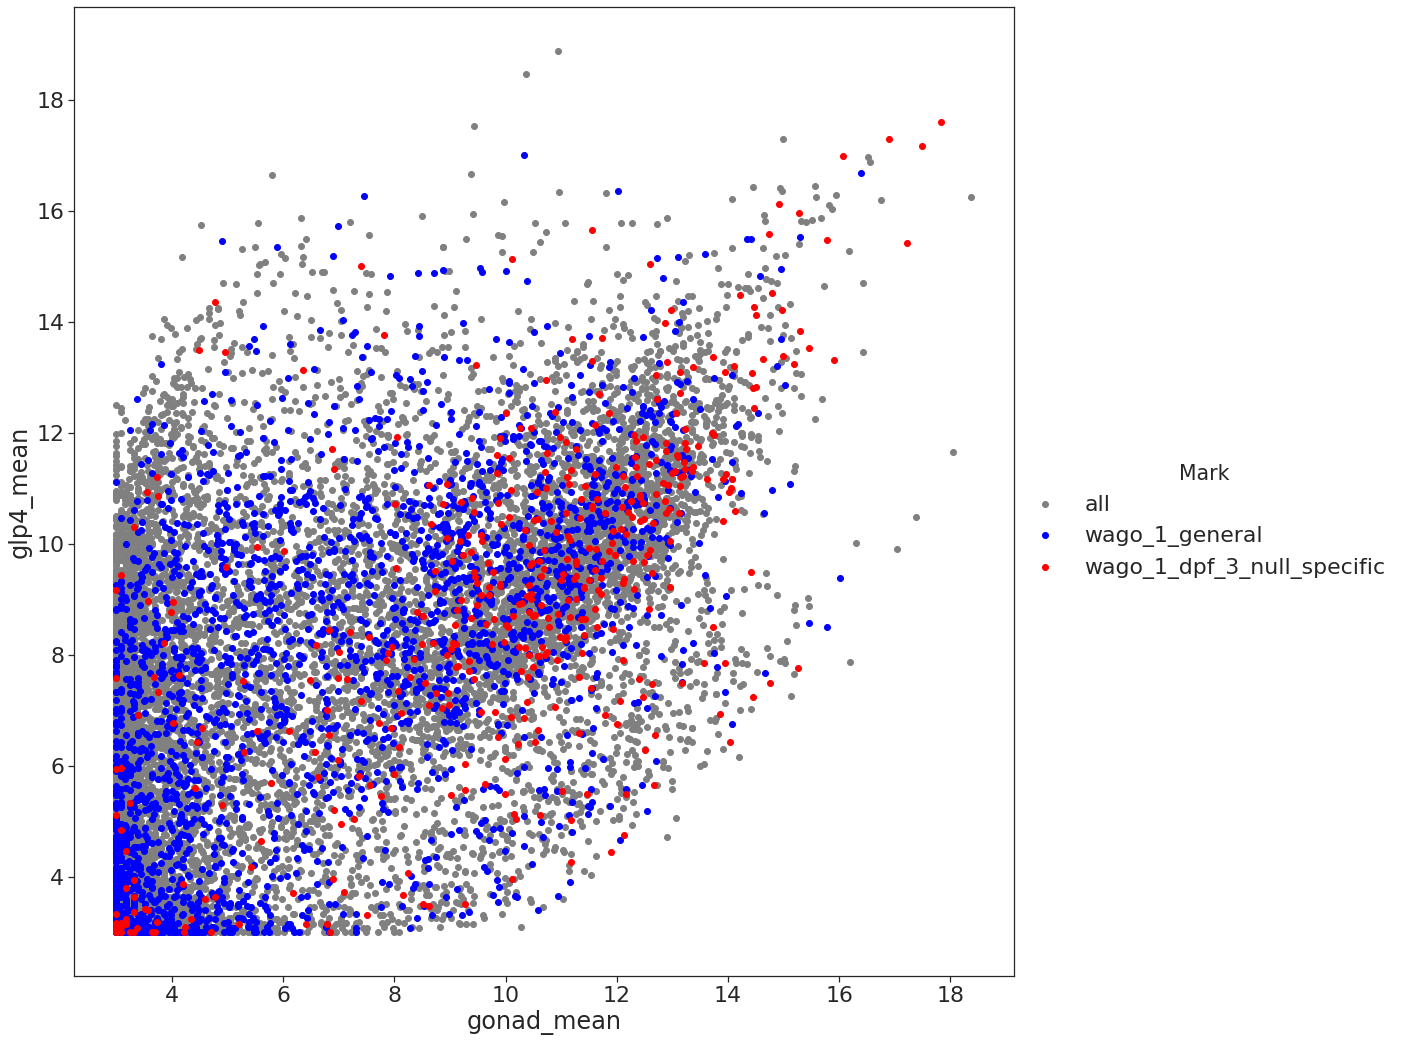

In [19]:
sns_plot = sns.lmplot(x="gonad_mean",
                      y="glp4_mean",
                      data=df,
                      fit_reg=False,
                      hue="Mark",
                      hue_order=["all", "wago_1_general", "wago_1_dpf_3_null_specific"],
                      palette=["gray", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
# sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

In [20]:
df["log2(mean)"] = df[["gonad_mean", "glp4_mean"]].mean(axis=1)

In [21]:
df["log2(FC)"] = df["gonad_mean"] - df["glp4_mean"]

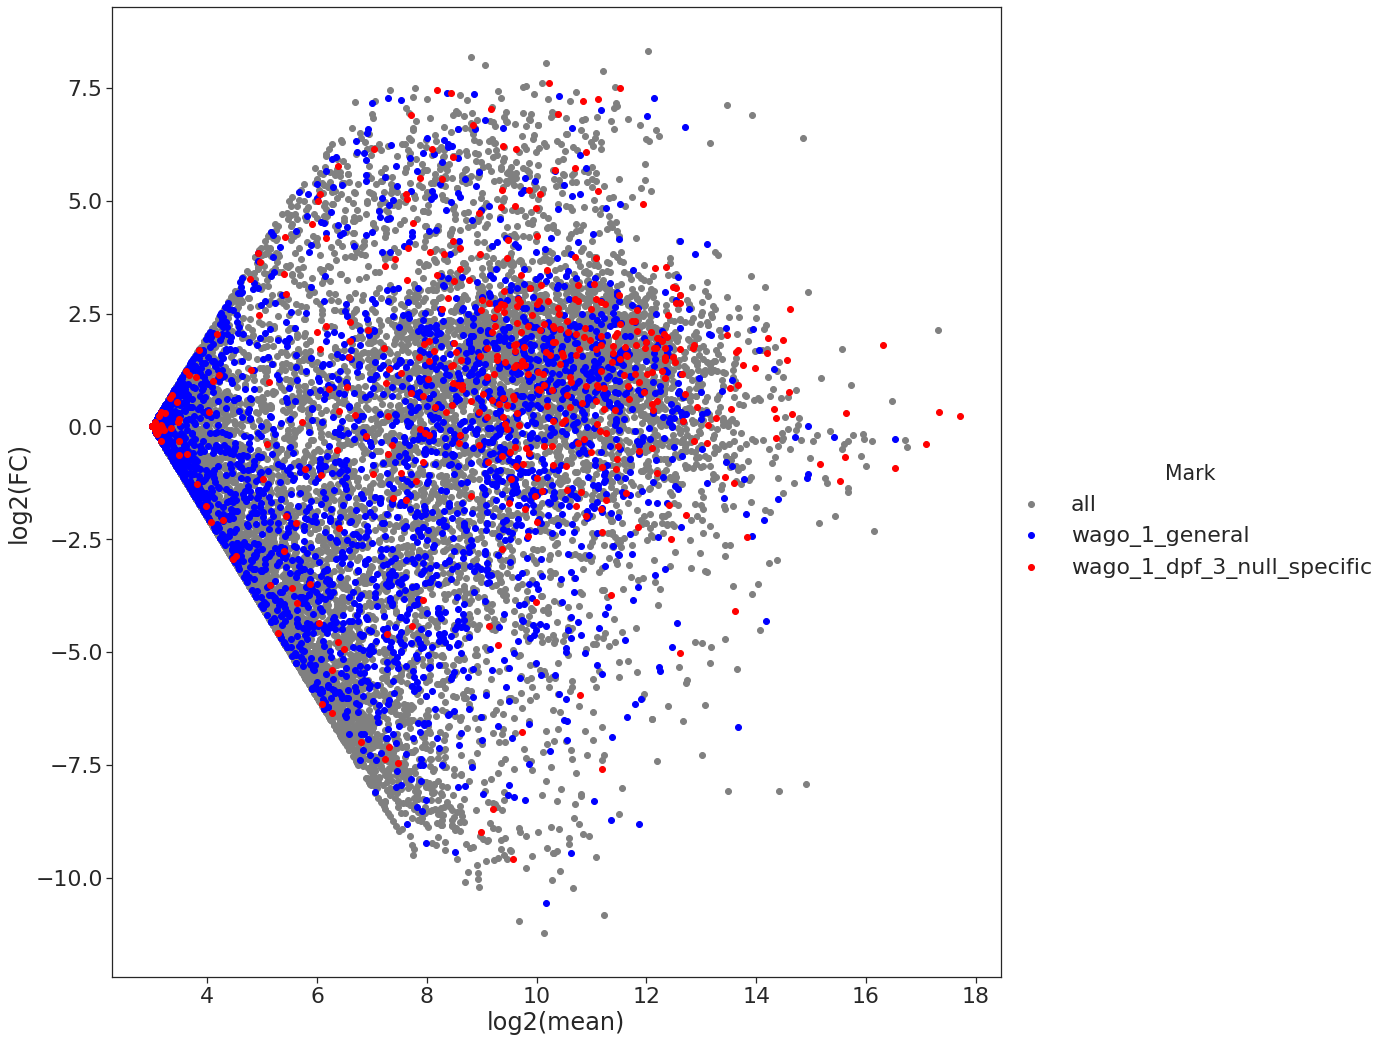

In [22]:
sns_plot = sns.lmplot(x="log2(mean)",
                      y="log2(FC)",
                      data=df,
                      fit_reg=False,
                      hue="Mark",
                      hue_order=["all", "wago_1_general", "wago_1_dpf_3_null_specific"],
                      palette=["gray", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
# sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)